# 3.0 Build models

AIMS

En este archivo se realizan los siguientes modelos:



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from mypackage import dir
from rfm import cut_rfm
from mypackage.transforms import convert_variables

modality =  modality = 'p'
project = 'australian'
data = dir.make_dir_line(modality, project) 
processed = data('processed')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

## 3.1 Load data

In [3]:
dataset = pd.read_parquet(processed/'dataset.parquet.gzip')
dataset = dataset.loc[:,['id_cliente', 'recency', 'frequency', 'monetary',]]
dataset.head()

,id_cliente,recency,frequency,monetary
0,1001,5,53,2592.016
1,1002,5,48,3161.840
2,1003,63,55,3025.264
3,1004,39,63,3657.104
4,1005,58,53,3396.528


## 3.2 RFM groups

In [7]:
df_models = dataset.copy()
df_models = cut_rfm(df_models)
# df_models = df_models.loc[:,['id_cliente', 'segment_rfm', 'group_rfm']]
df_models.head()

,id_cliente,recency,frequency,monetary,recency_rank,frequency_rank,monetary_value_rank,r_quartile,f_quartile,m_quartile,rfm_score,group_rfm,segment_rfm
0,1001,5,53,2592.016,96.0,50.0,24.0,5,3,2,532,New Customers,3
1,1002,5,48,3161.840,96.0,28.0,69.0,5,2,4,524,High New Customers,6
2,1003,63,55,3025.264,12.5,66.5,61.0,1,4,4,144,Need Attention,8
3,1004,39,63,3657.104,79.0,96.5,94.0,4,5,5,455,Champions,10
4,1005,58,53,3396.528,21.5,50.0,83.0,1,3,5,135,Need Attention,8


In [8]:
df_models['group_rfm'].value_counts()

group_rfm
New Customers               22
Need Attention              22
Hibernating                 16
About to Sleep              10
At Risk                      7
Champions                    6
High Potential               6
High New Customers           5
Low Potential                5
Uniquely Promising Highs     1
Name: count, dtype: int64

In [20]:
descripcion_por_grupo = df_models.groupby('group_rfm').describe()

descripcion_por_grupo

recency                                           \
                           count       mean        std   min    25%   50%   
group_rfm                                                                   
About to Sleep              10.0  54.400000   4.857983  50.0  51.00  53.0   
At Risk                      7.0  54.285714   5.618846  50.0  50.50  53.0   
Champions                    6.0  34.333333  13.618615  11.0  29.25  39.5   
Hibernating                 16.0  67.937500  25.893291  53.0  56.00  59.0   
High New Customers           5.0  35.000000  18.828170   5.0  29.00  42.0   
High Potential               6.0  38.500000  18.812230  10.0  26.75  50.0   
Low Potential                5.0  33.800000  20.921281   8.0  14.00  49.0   
Need Attention              22.0  58.000000   5.798193  53.0  54.00  55.5   
New Customers               22.0  28.363636  19.037671   1.0   8.25  30.0   
Uniquely Promising Highs     1.0  65.000000        NaN  65.0  65.00  65.0   

                                       frequency                             \
                            75%    max     count       mean       std   min   
group_rfm                                                                     
About to Sleep            55.25   64.0      10.0  49.200000  3.224903  45.0   
At Risk                   55.00   66.0       7.0  56.142857  1.864454  55.0   
Champions                 40.75   49.0       6.0  60.333333  4.082483  55.0   
Hibernating               65.25  156.0      16.0  45.000000  3.777124  38.0   
High New Customers        47.00   52.0       5.0  47.800000  2.863564  43.0   
High Potential            50.75   51.0       6.0  55.666667  4.802777  51.0   
Low Potential             49.00   49.0       5.0  57.800000  2.387467  55.0   
Need Attention            60.25   70.0      22.0  57.818182  3.064953  53.0   
New Customers             49.00   49.0      22.0  49.136364  4.085928  41.0   
Uniquely Promising Highs  65.00   65.0       1.0  46.000000       NaN  46.0   

                                                   monetary               \
                            25%   50%    75%   max    count         mean   
group_rfm                                                                  
About to Sleep            46.25  49.0  51.75  54.0     10.0  2772.371200   
At Risk                   55.00  55.0  56.50  60.0      7.0  2873.769143   
Champions                 57.00  61.5  63.00  65.0      6.0  3474.192000   
Hibernating               42.75  46.0  48.00  49.0     16.0  2311.508000   
High New Customers        48.00  48.0  50.00  50.0      5.0  3113.686400   
High Potential            54.00  54.5  55.00  65.0      6.0  3435.669333   
Low Potential             56.00  58.0  59.00  61.0      5.0  2768.828800   
Need Attention            55.50  57.5  60.75  64.0     22.0  3415.296000   
New Customers             46.00  49.0  53.00  54.0     22.0  2626.025455   
Uniquely Promising Highs  46.00  46.0  46.00  46.0      1.0  3137.952000   

                                                                              \
                                 std       min       25%       50%       75%   
group_rfm                                                                      
About to Sleep            214.404899  2344.112  2630.016  2809.168  2926.444   
At Risk                   135.859751  2651.808  2782.176  2932.704  2978.480   
Champions                 152.937929  3264.832  3372.032  3485.664  3584.716   
Hibernating               310.532659  1663.856  2061.196  2291.968  2519.612   
High New Customers         89.475936  3030.064  3031.936  3104.624  3161.840   
High Potential            206.273551  3168.768  3298.448  3426.824  3578.012   
Low Potential             134.860721  2561.856  2725.888  2782.768  2882.832   
Need Attention            241.880797  3025.264  3216.848  3378.848  3638.324   
New Customers             278.625685  1944.064  2407.384  2691.960  2836.600   
Uniquely Promising Highs         NaN  3137.952

## 3.3 kmeans

In [140]:
dataset = pd.read_parquet(processed/'dataset.parquet.gzip')
dataset = dataset.loc[:,['id_cliente', 'sexo', 'age_days', 'recency', 'monetary',
       'Babucha', 'Bermuda', 'Calza', 'Camisa', 'Capri', 'Chaleco', 'Jean',
       'Mini', 'Pantalón', 'Pollera', 'Remera', 'Short',
       'Strapless', 'Vestido', 'local']]
dataset.head()

,id_cliente,sexo,age_days,recency,monetary,Babucha,Bermuda,Calza,Camisa,Capri,Chaleco,Jean,Mini,Pantalón,Pollera,Remera,Short,Strapless,Vestido,local
0,1001,1,34263,5,2592.016,0.000000,0.035714,0.053571,0.107143,0.053571,0.107143,0.107143,0.035714,0.000000,0.000000,0.053571,0.142857,0.035714,0.053571,0.500000
1,1002,1,30482,5,3161.840,0.020408,0.020408,0.000000,0.102041,0.102041,0.102041,0.163265,0.000000,0.020408,0.000000,0.102041,0.142857,0.000000,0.000000,0.510204
2,1003,0,39372,63,3025.264,0.035714,0.017857,0.000000,0.125000,0.071429,0.053571,0.142857,0.035714,0.017857,0.000000,0.125000,0.107143,0.071429,0.000000,0.517857
3,1004,0,14288,39,3657.104,0.015385,0.015385,0.000000,0.153846,0.107692,0.030769,0.092308,0.015385,0.000000,0.015385,0.153846,0.123077,0.015385,0.000000,0.630769
4,1005,0,2810,58,3396.528,0.000000,0.000000,0.017544,0.105263,0.105263,0.070175,0.192982,0.052632,0.017544,0.000000,0.105263,0.035088,0.052632,0.035088,0.421053


In [141]:
# Escalar las características
scaler = MinMaxScaler()
scaler2 = StandardScaler()
data_scaled = scaler.fit_transform(dataset.loc[:, dataset.columns != 'id_cliente'])
data_scaled = scaler2.fit_transform(data_scaled)

In [142]:
cluster_range = range(2, 12)
inertia_values = []
silhouette_scores = []

for n_clusters in cluster_range:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    
    # Append inertia (codo) and silhouette score to the lists
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

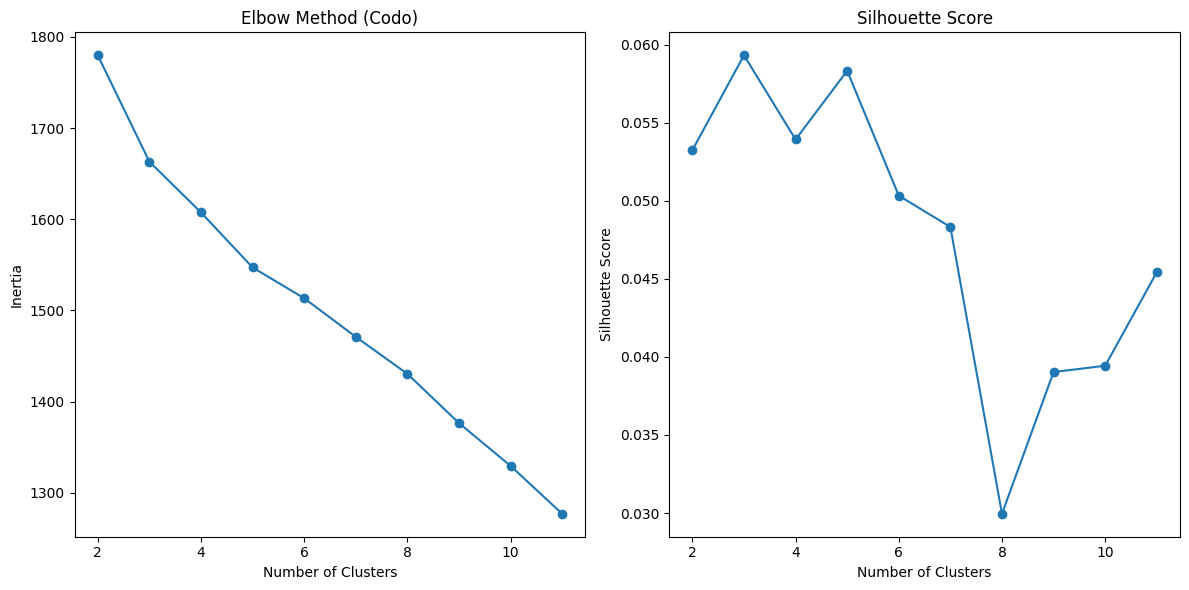

In [143]:
# Plot the elbow method (codo)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method (Codo)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [144]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [145]:
df_models['group_kmeans'] = kmeans.predict(data_scaled)
df_models.head()

,id_cliente,segment_rfm,group_rfm,group_kmeans
0,1001,3,New Customers,1
1,1002,6,High New Customers,1
2,1003,8,Need Attention,1
3,1004,10,Champions,0
4,1005,8,Need Attention,1


In [146]:
df_models['group_kmeans'].value_counts()

group_kmeans
1    43
0    31
2    26
Name: count, dtype: int64

## 3.4 GMM

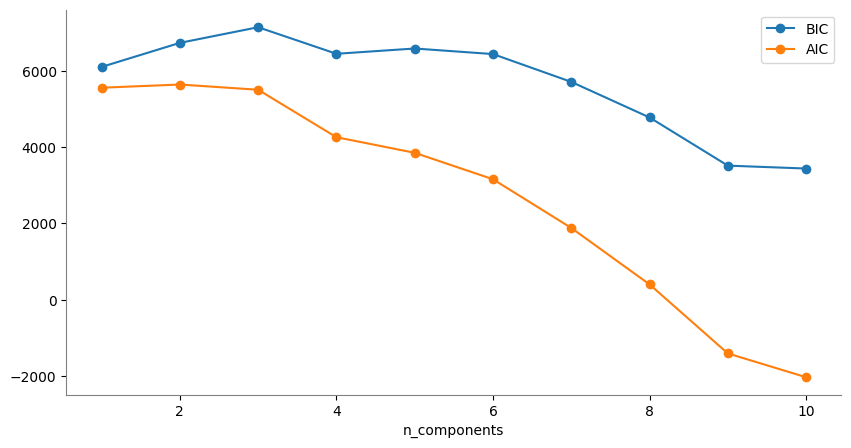

In [148]:
n_components = np.arange(2, 11)

gaussianModels = [
    GaussianMixture(n, covariance_type="full", random_state=0).fit(data_scaled)
    for n in n_components
]

plt.figure(figsize=(10, 5))
plt.plot(n_components, [model.bic(data_scaled) for model in gaussianModels], "o-", label="BIC")
plt.plot(n_components, [model.aic(data_scaled) for model in gaussianModels], "o-", label="AIC")
plt.legend(loc="best")
plt.xlabel("n_components")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

In [185]:
n_components = 3
gaussianMixture = GaussianMixture(
    n_components=n_components,
    covariance_type="full",
    max_iter=100,
    init_params="kmeans", #ramdom
)

gaussianMixture.fit(data_scaled)
df_models["group_gmm"] = gaussianMixture.predict(data_scaled)
dataset["group_gmm"] = gaussianMixture.predict(data_scaled)

In [186]:
dataset.head()

,id_cliente,sexo,age_days,recency,monetary,Babucha,Bermuda,Calza,Camisa,Capri,Chaleco,Jean,Mini,Pantalón,Pollera,Remera,Short,Strapless,Vestido,local,group_gmm
0,1001,1,34263,5,2592.016,0.000000,0.035714,0.053571,0.107143,0.053571,0.107143,0.107143,0.035714,0.000000,0.000000,0.053571,0.142857,0.035714,0.053571,0.500000,0
1,1002,1,30482,5,3161.840,0.020408,0.020408,0.000000,0.102041,0.102041,0.102041,0.163265,0.000000,0.020408,0.000000,0.102041,0.142857,0.000000,0.000000,0.510204,2
2,1003,0,39372,63,3025.264,0.035714,0.017857,0.000000,0.125000,0.071429,0.053571,0.142857,0.035714,0.017857,0.000000,0.125000,0.107143,0.071429,0.000000,0.517857,1
3,1004,0,14288,39,3657.104,0.015385,0.015385,0.000000,0.153846,0.107692,0.030769,0.092308,0.015385,0.000000,0.015385,0.153846,0.123077,0.015385,0.000000,0.630769,1
4,1005,0,2810,58,3396.528,0.000000,0.000000,0.017544,0.105263,0.105263,0.070175,0.192982,0.052632,0.017544,0.000000,0.105263,0.035088,0.052632,0.035088,0.421053,2


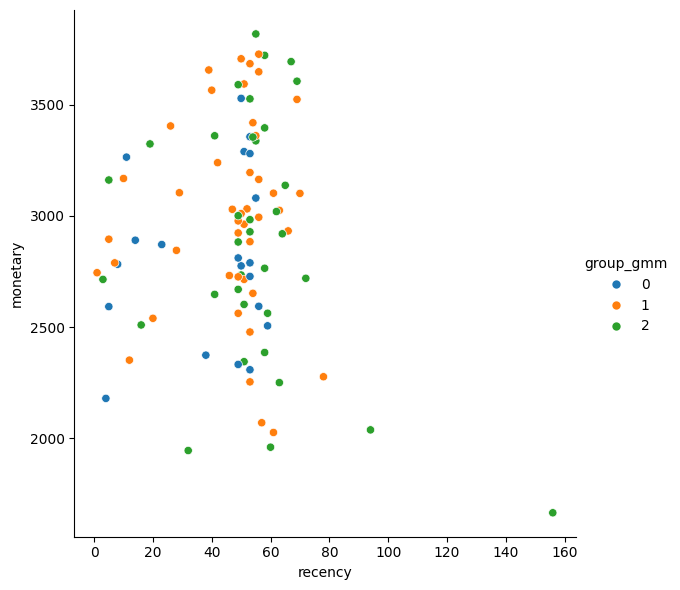

In [187]:
# Revisar (no terminados)
# sns.relplot(
#     x="recency",
#     y="monetary",
#     data=dataset,
#     hue="group_gmm",
#     height=6,
#     palette="tab10",
# )
# plt.show()

In [ ]:
print('ok_')